<a href="https://colab.research.google.com/github/DaeHee99/2022S-ML/blob/main/HW3_201820762_%EB%AA%A9%EB%8C%80%ED%9D%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW3 :: Parameter Tuning and Classifcation**

## 코랩과 구글 드라이브 연동 OR 로컬에서 파일 업로드
- 해당 섹션 코드 수정 가능

In [ ]:
# 연동 OR 파일 업로드
# 연동 시 path 설정 주의

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 데이터 불러오기

In [127]:
import numpy as np
import pandas as pd

In [128]:
path = 'heart_clean.csv' # 제공된 csv 파일 사용
df = pd.read_csv(path)

In [129]:
df.head()

,Age,RestingBP,FastingBS,ExerciseAngina,Oldpeak,HeartDisease
0,53,120,0,0,0.0,0
1,65,134,0,1,1.1,1
2,60,160,0,1,0.5,1
3,57,150,1,0,0.2,0
4,57,150,0,1,0.6,1


## 데이터 나누기

### **주의 사항**
train_test_split에 random seed를 사용하여 split set을 고정한다.
- 모든 문제에 같은 random seed를 부여할 필요는 없다.


In [130]:
from sklearn.model_selection import train_test_split

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9)

print("X_train's shape : ", X_train.shape)
print("y_train's shape : ", y_train.shape)
print("\nX_val's shape : ", X_val.shape)
print("y_val's shape : ", y_val.shape)
print("\nX_test's shape : ", X_test.shape)
print("y_test's shape : ", y_test.shape)

X_train's shape :  (568, 5)
y_train's shape :  (568,)

X_val's shape :  (71, 5)
y_val's shape :  (71,)

X_test's shape :  (71, 5)
y_test's shape :  (71,)




---



## 문제1 KNN



- Scikit-learn 라이브러리를 이용하여 KNN의 최적의 파라미터를 찾는다.
    - 최근접 이웃을 찾기 위한 거리의 종류로 최소한 두 가지 이상의 거리 척도를 사용한다.
    - K값을 최소 3개 이상 비교한다.
    - 거리 척도, k값에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 k값, y축 정확도)
    - 찾은 최적의 파라미터와 test set 이용하여 test_accuracy 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.



Text(0, 0.5, 'accuracy')

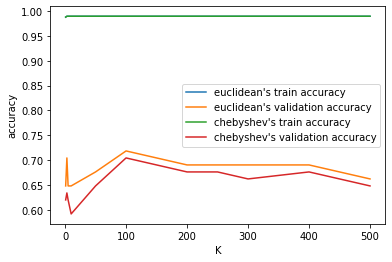

In [131]:
### 문제 1 ###
## 코드 작성 ##
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

K = [1, 3, 5, 10, 50, 100, 150, 200, 250, 300, 400, 500]  # 비교할 K 값 후보
dis_metric = ["euclidean", "chebyshev"]  # 2가지 거리 척도

# train_test_split에 random seed(16)를 사용하여 split set을 고정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=16)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9, random_state=16)

plt.figure()

for DM in dis_metric:
  train_acc = []
  val_acc = []
  for k in K:
    # knn classifier 생성
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance", metric=DM)
    # training data를 사용하여 모델 training
    knn.fit(X_train, y_train)

    # train set에 대해 predict를 진행
    result = knn.predict(X_train)
    # 실제 label과 예측한 label의 score를 계산해 train accuracy를 구한다.
    train_acc.append(accuracy_score(y_train, result)) 

    # validation set에 대해 predict를 진행
    result = knn.predict(X_val)
    # 실제 label과 예측한 label의 score를 계산해 validation accuracy를 구한다.
    val_acc.append(accuracy_score(y_val, result))

  plt.plot(K, train_acc, label=DM + "'s train accuracy")
  plt.plot(K, val_acc, label=DM + "'s validation accuracy")

plt.legend() # 범례 표시
plt.xlabel('K')
plt.ylabel('accuracy')


In [132]:
# 최적의 파라미터(k = 100, 거리 척도 = "euclidean")를 사용한 knn 모델
knn = KNeighborsClassifier(n_neighbors=100, weights="distance", metric="euclidean")
# train set과 validation set을 합쳐서 fit
knn.fit(pd.concat([X_train,X_val]), pd.concat([y_train,y_val]))

# test set에 대해 predict를 진행
result = knn.predict(X_test)
# 실제 label과 예측한 label의 score를 계산해 test accuracy를 구한다.
print("test_accuracy = ", accuracy_score(y_test, result))

test_accuracy =  0.5915492957746479


**설명 작성**  
- 최적의 파라미터: k = 100, metric = "euclidean"
- 설명: 위의 그래프를 살펴보면, 여러 가지 k 값을 통해 validation을 수행한 결과, euclidean 거리 척도와 chebyshev 거리 척도 모두에서 k가 100일 때에 validation accuracy가 가장 높은 경향을 보였다. 또한 k가 100일 때뿐만 아니라 모든 k 값에서 전체적으로 chebyshev보다 euclidean 거리 척도를 사용했을 때에 validation accuracy가 높았다.



---



## 문제2 SVM


- Scikit-learn 라이브러리를 이용하여 SVM의 최적의 파라미터를 찾는다.
    - Kernel trick 중 최소 두개를 비교한다.
    - 최적의 파라미터 C값을 찾는다.
    - 파라미터에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 C값, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.


Text(0, 0.5, 'accuracy')

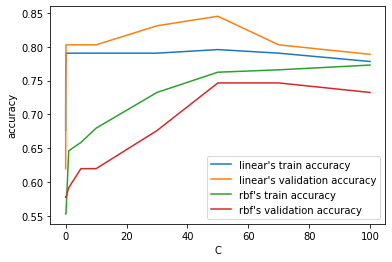

In [133]:
### 문제 2 ###
## 코드 작성 ##
from sklearn.svm import SVC   # Support vector classifier

c_val = [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 30.0, 50.0, 70.0, 100.0]   # 비교할 C 값 후보
kernel_trick = ["linear", "rbf"]   # 2가지 Kernel trick

# train_test_split에 random seed(1)를 사용하여 split set을 고정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9, random_state=10)

plt.figure()

for k in kernel_trick:
  train_acc = []
  val_acc = []
  for c in c_val:
    # SVM classifier 생성
    my_svm = SVC(kernel=k, C = c)
    # training data를 사용하여 모델 training
    my_svm.fit(X_train, y_train)

    # train set에 대해 predict를 진행
    result = my_svm.predict(X_train)
    # 실제 label과 예측한 label의 score를 계산해 train accuracy를 구한다.
    train_acc.append(accuracy_score(y_train, result))

    # validation set에 대해 predict를 진행
    result = my_svm.predict(X_val)
    # 실제 label과 예측한 label의 score를 계산해 validation accuracy를 구한다.
    val_acc.append(accuracy_score(y_val, result))

  plt.plot(c_val, train_acc, label=k + "'s train accuracy")
  plt.plot(c_val, val_acc, label=k + "'s validation accuracy")

plt.legend() # 범례 표시
plt.xlabel('C')
plt.ylabel('accuracy')

In [11]:
# 최적의 파라미터(C = 50.0, Kernel trick = "linear")를 사용한 SVM 모델
my_svm = SVC(kernel="linear", C=50.0)
# train set과 validation set을 합쳐서 fit
my_svm.fit(pd.concat([X_train,X_val]), pd.concat([y_train,y_val]))

# test set에 대해 predict
result = my_svm.predict(X_test)
# 실제 label과 예측한 label의 score를 계산해 test accuracy를 구한다.
print("test_accuracy = ", accuracy_score(y_test, result))

test_accuracy =  0.8169014084507042


**설명 작성**  
- 최적의 파라미터: C = 50.0, Kernel trick = "linear"
- 설명: 위의 그래프를 살펴보면, 여러 가지 C 값을 통해 validation을 수행한 결과, "linear" Kernel trick과 "rbf" Kernel trick 모두에서 C가 50.0일 때에 validation accuracy가 가장 높은 경향을 보였다. 또한 C가 50.0일 때뿐만 아니라 모든 C 값에서 전체적으로 "rbf"보다 "linear" Kernel trick을 사용했을 때에 validation accuracy가 높았다.



---



## 문제3 Cross validation with Random Forest
### 3-1: k-fold
- 수업시간에 배운 **5-fold** 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 random forest 모델의 파라미터를 cross-validation을 바탕으로 최적화한다.
    - **5-fold CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
    - 파라미터에 따라 K-fold CV를 통해 나온 평균 정확도와 각 fold의 정확도들을 한 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

### 3-2: Leave One Out
- 수업시간에 배운 Leave-One-Out 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 random forest 모델의 파라미터를 cross-validation을 바탕으로 최적화한다.
  - **Leave-One-Out CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
  - 파라미터에 따라 Leave-One-Out CV를 통해 나온 평균 정확도를 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
  - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
  - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

Text(0, 0.5, 'accuracy')

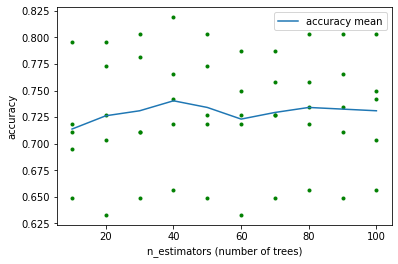

In [12]:
### 문제 3-1 ###
## 코드 작성 ##
from sklearn.ensemble import RandomForestClassifier   # Random Forest
from sklearn.model_selection import KFold   # k-fold

# train_test_split에 random seed(10)를 사용하여 split set을 고정
# training과 cross validation에 사용할 데이터 = 전체 데이터의 90% (나머지는 test data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

plt.figure()

mean_acc = []  # 각 파라미터에 따라 K-fold CV를 통해 나온 평균 정확도
kfold = KFold(n_splits=5)  # 5-fold CV
num_of_trees = [n for n in range(10,101,10)]  # random forest 모델의 파라미터 (n_estimators) 후보

for n in num_of_trees:
  # Random Forest Classifier 생성
  RandomForest = RandomForestClassifier(n_estimators=n, random_state=0)
  n_acc = []  # 파라미터(n)의 5-fold CV를 통해 나온 정확도 (5개)

  for train_index, test_index in kfold.split(X_train):
    # 5-fold CV에 따라 train data를 train set과 test set으로 나눈다 (원래의 test data는 관여 X)
    X_train_fold, X_test_fold = X_train.loc[train_index], X_train.loc[test_index]
    y_train_fold, y_test_fold = y_train.loc[train_index], y_train.loc[test_index]

    # 각 fold의 training data를 사용하여 모델 training
    RandomForest.fit(X_train_fold, y_train_fold)

    # 각 fold의 test set에 대해 predict를 진행한다.
    result = RandomForest.predict(X_test_fold)
    # 실제 label과 예측한 label의 score를 계산해 각 fold test accuracy를 구한다.
    n_acc.append(accuracy_score(y_test_fold, result))

  mean_acc.append(np.mean(n_acc))  # 각 파라미터의 5-fold CV를 통해 나온 평균 정확도
  plt.plot([n]*5, n_acc, 'g.')   # 각 파라미터의 5-fold CV를 통해 나온 각 fold의 정확도를 그래프에 점으로 찍음.

# 모든 파라미터의 5-fold CV를 통해 나온 평균 정확도를 그래프에 그림.
plt.plot(num_of_trees, mean_acc, label="accuracy mean")

plt.legend() # 범례 표시
plt.xlabel('n_estimators (number of trees)')
plt.ylabel('accuracy')

In [13]:
# 최적의 파라미터(n_estimators = 40)를 사용한 Random Forest 모델
RandomForest = RandomForestClassifier(n_estimators=40, random_state=0)
# train set을 사용하여 모델 training
RandomForest.fit(X_train, y_train)

# test set에 대해 predict
result = RandomForest.predict(X_test)
# 실제 label과 예측한 label의 score를 계산해 test accuracy를 구한다.
print("test_accuracy = ", accuracy_score(y_test, result))

test_accuracy =  0.8169014084507042


**설명 작성**  
- test accuracy: 0.8169014084507042
- 최적의 파라미터: n_estimators = 40
- 설명: 위의 그래프를 살펴보면, 여러 가지 n_estimators hyper-parameter 값을 통해 5-fold cross validation을 수행한 결과, n_estimators 값이 40일 때에 5-fold CV를 통해 나온 평균 정확도가 가장 높았다. 또한 n_estimators 값이 40일 때, 각 fold의 정확도 중 최대값과 최소값이 다른 n_estimators 값의 fold 정확도 최대값과 최소값보다 모두 높았다.



Text(0, 0.5, 'accuracy')

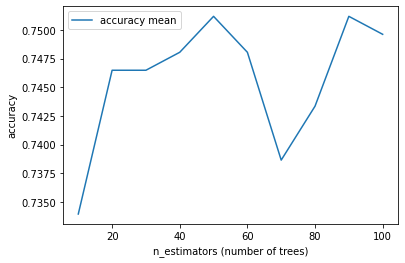

In [14]:
### 문제 3-2 ###
## 코드 작성 ##
from sklearn.ensemble import RandomForestClassifier   # Random Forest
from sklearn.model_selection import LeaveOneOut   # Leave-One-Out

# train_test_split에 random seed(10)를 사용하여 split set을 고정
# training과 cross validation에 사용할 데이터 = 전체 데이터의 90% (나머지는 test data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

plt.figure()

mean_acc = []  # 각 파라미터에 따라 Leave-One-Out CV를 통해 나온 평균 정확도
loo = LeaveOneOut()  # Leave-One-Out CV
num_of_trees = [n for n in range(10,101,10)]  # random forest 모델의 파라미터 (n_estimators) 후보

for n in num_of_trees:
  # Random Forest Classifier 생성
  RandomForest = RandomForestClassifier(n_estimators=n, random_state=0)
  n_acc = []  # 파라미터(n)의 Leave-One-Out CV를 통해 나온 정확도

  for train_index, test_index in loo.split(X_train):
    # Leave-One-Out CV에 따라 train data를 train set과 test set으로 나눈다, (원래의 test data는 관여 X)
    X_train_loo, X_test_loo = X_train.loc[train_index], X_train.loc[test_index]
    y_train_loo, y_test_loo = y_train.loc[train_index], y_train.loc[test_index]

    # 각 단계의 training data를 사용하여 모델 training
    RandomForest.fit(X_train_loo, y_train_loo)

    # 각 단계의 test set에 대해 predict를 진행한다.
    result = RandomForest.predict(X_test_loo)
    # 실제 label과 예측한 label의 score를 계산해 각 단계의 test accuracy를 구한다.
    n_acc.append(accuracy_score(y_test_loo, result))

  mean_acc.append(np.mean(n_acc))  # 각 파라미터의 Leave-One-Out CV를 통해 나온 평균 정확도

# 모든 파라미터의 Leave-One-Out CV를 통해 나온 평균 정확도를 그래프에 그림.
plt.plot(num_of_trees, mean_acc, label="accuracy mean")

plt.legend() # 범례 표시
plt.xlabel('n_estimators (number of trees)')
plt.ylabel('accuracy')

In [15]:
# 최적의 파라미터(n_estimators = 50)를 사용한 Random Forest 모델
RandomForest = RandomForestClassifier(n_estimators=50, random_state=0)
# train set을 사용하여 모델 training
RandomForest.fit(X_train, y_train)

# test set에 대해 predict
result = RandomForest.predict(X_test)
# 실제 label과 예측한 label의 score를 계산해 test accuracy를 구한다.
print("test_accuracy = ", accuracy_score(y_test, result))

test_accuracy =  0.7887323943661971


**설명 작성**  
- test accuracy: 0.7887323943661971
- 최적의 파라미터: n_estimators = 50
- 설명: 위의 그래프를 살펴보면, 여러 가지 n_estimators hyper-parameter 값을 통해 Leave-One-Out cross validation을 수행한 결과, n_estimators 값이 50일 때에 Leave-One-Out CV를 통해 나온 평균 정확도가 가장 높았다. 또한 n_estimators 값이 90일 때에도 Leave-One-Out CV를 통해 나온 평균 정확도가 40과 비슷하게 높았지만, 90을 사용하면 overfitting 할 것 같아서 40을 선택했다.



---



## 문제4 Regression
문제 4 에서는 캘리포니아 주택 가격 데이터셋을 사용합니다.   
학습을 통해 주택 가격을 예측하는 문제입니다.  
데이터에 대한 자세한 설명은 아래 코드의 description을 참고해주세요.

In [61]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [62]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target

In [63]:
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [64]:
print(df.shape) #(20640, 9)
print(df.describe())

(20640, 9)
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308  

### 문제 4-1 : Pearson Correlation
- seaborn 패키지를 사용하여 pearson correlation heatmap을 그린다.
- heatmap을 확인한 후 각 feature들 간 어떠한 관계가 있는지 아래의 텍스트 셀에 서술한다.    
- target과 연관성이 높은 feature의 column들을 아래의 텍스트 셀에 기술한다.
- 기술한 columns들과 target column을 포함하여 DataFrame을 만들고 **이후 모든 문제에서는 이 DataFrame을 사용한다**.

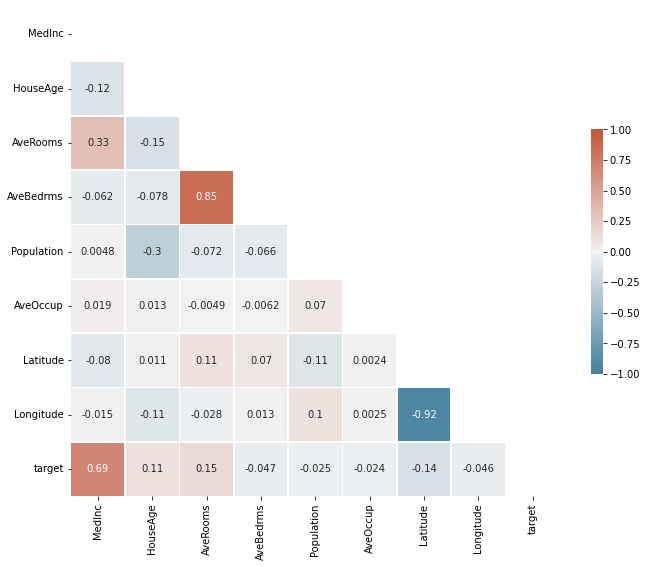

In [102]:
### 문제 4-1 ###
# correlation map 작성 후 plot
import seaborn as sns

# correlation matrix 계산하기
corr = df.corr()

# 위 삼각형에대한 마스크 생성하기
mask = np.triu(np.ones_like(corr, dtype=bool))

# matplotlib figure 설정하기
f, ax = plt.subplots(figsize=(11, 9))

# colormap 설정하기
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# heatmap 그리기
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


- **Feature들 간 관계 서술**  
  답: 각 feature들 간의 상관계수가 1에 가까워질 수록(positive) 하나가 증가할때 다른 하나도 함께 증가하는 경향이 나타나고, -1에 가까워질 수록(negative) 하나가 증가하면 다른 하나가 감소하는 경향이 있다. 그리고 그 상관계수의 절대값이 클수록 더 강한 연관성을 갖는다.
  
  위의 feature들로 예를 들어보면, AveRooms과 AveBedrms의 상관 계수가 0.85로 상당히 높기 때문에 높은 양의 상관관계를 가지므로 평균 room의 개수가 증가하면 평균 bedroom의 개수도 함께 증가하는 경향이 크다. 반면에, Latitude와 Longitude의 상관 계수는 -0.92로 상당히 낮기 때문에 높은 음의 상관관계를 가지므로 Latitude가 증가하면 Longitude는 반대로 감소하는 경향이 크다. 또한, AveRooms과 MedInc은 상관 계수가 0.33으로 AveRooms과 AveBedrms의 상관 계수인 0.85보다는 낮지만, 양의 상관 계수를 가지므로 수입이 증가할수록 평균 방의 개수도 함께 증가하는 경향이 있고, 그 상관 관계는 AveRooms과 AveBedrms의 상관 관계보다는 비교적 낮다는 의미를 가진다.

  관심있는 feature인 target과 연관성이 높은 feature들을 선택하자면 MedInc, HouseAge, AveRooms, Latitude이다. 이 4개의 feature들은 target과의 상관계수의 절대값이 다른 feature에 비해 비교적 높기 때문에 target과 연관성이 높다고 판단했다. 물론 Latitude의 경우 음의 상관관계를 가지므로, Latitude가 증가하면 target이 감소하는 비교적 큰 관계가 있을 것이라고 판단하여 선택했다.

- **최종 선택한 feature들**  
  답: MedInc, HouseAge, AveRooms, Latitude

In [103]:
### 문제 4-1 ###
# 새 dataframe 만들기 
data_clean = df[['MedInc', 'HouseAge', 'AveRooms', 'Latitude', 'target']]
data_clean.head()

,MedInc,HouseAge,AveRooms,Latitude,target
0,8.3252,41.0,6.984127,37.88,4.526
1,8.3014,21.0,6.238137,37.86,3.585
2,7.2574,52.0,8.288136,37.85,3.521
3,5.6431,52.0,5.817352,37.85,3.413
4,3.8462,52.0,6.281853,37.85,3.422


### 문제 4-2: MSE, r2 score
- Scikit-learn 라이브러리의 LinearRegression 모델을 사용한다.
- train data는 test data를 제외한 **90%의 데이터를 사용**해야한다.
- **Mean Square Error(MSE)**와 **r2 score**를 사용하여 train set에 대한 prediction 결과와 test set에 대한 prediction 결과를 구해 print 한다.
- Prediction 결과를 바탕으로 학습한 LinearRegression 모델의 overfit, underfit 여부와 판단 근거를 텍스트 셀에 서술한다.

In [104]:
### 문제 4-2 ###
## 코드 작성 ##
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# train_test_split에 random seed(60)를 사용하여 split set을 고정
# training에 사용할 데이터 = 전체 데이터의 90% (나머지는 test data)
X = data_clean.drop('target', axis=1)
y = data_clean['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=60)

# LinearRegression 모델
LR = LinearRegression()
# train set을 사용하여 모델 training
LR.fit(X_train, y_train)

# train set에 대해 predict
result = LR.predict(X_train)
# MSE 계산
print("train's MSE = ", mean_squared_error(y_train, result))
# r2 score 계산
print("train's r2 score = ", r2_score(y_train, result))

# test set에 대해 predict
result = LR.predict(X_test)
# MSE 계산
print("test's MSE = ", mean_squared_error(y_test, result))
# r2 score 계산
print("test's r2 score = ", r2_score(y_test, result))


train's MSE =  0.6358679154469103
train's r2 score =  0.5214291815686158
test's MSE =  0.6825170402298409
test's r2 score =  0.49717832430807785


**Prediction 결과를 바탕으로 학습한 LinearRegression 모델의 overfit, underfit 여부와 판단 근거를 서술**   
답: train set으로 모델을 학습했으므로, train set에 대한 predict가 test set에 대한 predict보다 높은 예측률을 가질 확률이 비교적 높다. 높은 예측률을 가진다는 것은 결국 MSE가 비교적 0에 더 가깝고, r2 score가 1에 더 가깝다는 의미다.

실제로 위의 prediction 결과를 확인해보면, MSE는 train set에서 test set보다 비교적 0에 더 가깝고, r2 score는 train set에서 test set보다 비교적 1에 더 가깝다. 결국 이를 통해, 학습한 LinearRegression 모델이 underfit하지 않다는 것을 알 수 있다. 또한, train set과 test set의 MSE와 r2 score 각각의 차이가 크다면 모델이 overfit하다고 판단할 수 있는데, 실제로 결과에서는 차이가 크지 않다고 생각하여 overfit하지 않다고 보여진다.

### 문제 4-3: Regularized Model
- Scikit-learn 라이브러리를 사용하여 Ridge Regression과 Lasso Regression 모델을 만든다.
- train : validation : test **데이터셋의 비율을 8:1:1**로 설정한다.
- 다양한 alpha 값에 대해 validation dataset을 사용하여 각 모델에 대한 **최적의 alpha 값을 찾고 찾은 최적의 alpha 값을 텍스트 셀에 작성**한다.
- alpha 값은 아래의 리스트를 사용한다.  
```alpha = [0.0001, 0.001,0.01,0.1,10]```
- alpha 값에 대한 R2 score의 변화를 그래프로 나타낸다.
  * **x축: alpha 값**
  * **y축: R2 score 값**
  * 파란색 선: Ridge 결과, 빨간색 선: Lasso 결과
  * 그래프에 **legend**가 포함되어 있어야 한다. 
- **train과 validation dataset을 합하여 train set을 만든 후 최종 학습 결과를 도출**한다.
  * 최적의 alpha 값을 찾을 때 사용한 test set은 변하지 않는다. 
  * r2 score를 사용하여 train set에 대한 prediction 결과와 test set에 대한 prediction 결과를 구해 print 한다.

In [105]:
### 문제 4-3 ###
## 코드 작성 ##
from sklearn.linear_model import Ridge, Lasso

# train_test_split에 random seed(60)를 사용하여 split set을 고정
# train : validation : test 데이터셋의 비율 = 8:1:1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=60)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9, random_state=60)

alpha = [0.0001, 0.001,0.01,0.1,1,10]

r2_ridge = []
r2_lasso = []

for a in alpha:
  # Ridge Regression 모델
  ridge = Ridge(alpha=a)
  # Lasso Regression 모델
  lasso = Lasso(alpha=a)

  # train set을 사용하여 각각의 모델 training
  ridge.fit(X_train, y_train)
  lasso.fit(X_train, y_train)

  # validation set에 대해 predict (Ridge Regression)
  result = ridge.predict(X_val)
  # r2 score 계산 (Ridge Regression)
  r2_ridge.append(r2_score(y_val, result))

  # validation set에 대해 predict (Lasso Regression)
  result = lasso.predict(X_val)
  # r2 score 계산 (Lasso Regression)
  r2_lasso.append(r2_score(y_val, result))

Text(0, 0.5, 'Lasso R2 score')

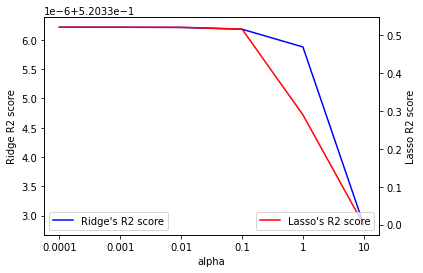

In [123]:
### 문제 4-3 ###
## 그래프 작성 ##
val = range(len(alpha)) # x축 동일한 간격의 임의 값 목록

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # 이중 y축

ax1.plot(val, r2_ridge, label="Ridge's R2 score", color='blue')  # Ridge
ax2.plot(val, r2_lasso, label="Lasso's R2 score", color='red')  # Lasso
plt.xticks(val,alpha) # x축 눈금 - alpha 값

ax1.legend(loc='lower left') # 범례 표시
ax2.legend(loc='lower right') # 범례 표시
ax1.set_xlabel('alpha') # x축 레이블
ax1.set_ylabel('Ridge R2 score') # y축 레이블
ax2.set_ylabel('Lasso R2 score') # y축 레이블

- Rridge regression 모델 최적의 alpha 값: 0.01
- Lasso regression 모델 최적의 alpha 값: 0.01

In [126]:
### 문제 4-3 ###
# 최종 결과 출력
X_train = pd.concat([X_train, X_val])
y_train = pd.concat([y_train, y_val])

# Ridge Regression 모델
ridge = Ridge(alpha=0.01)
# Lasso Regression 모델
lasso = Lasso(alpha=0.01)

# train set을 사용하여 각각의 모델 training
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# train set에 대해 predict (Ridge Regression)
result = ridge.predict(X_train)
# r2 score 계산 (Ridge Regression)
print("train's Ridge R2 score = ", r2_score(y_train, result))

# train set에 대해 predict (Lasso Regression)
result = lasso.predict(X_train)
# r2 score 계산 (Lasso Regression)
print("train's Lasso R2 score = ", r2_score(y_train, result))

# test set에 대해 predict (Ridge Regression)
result = ridge.predict(X_test)
# r2 score 계산 (Ridge Regression)
print("test's Ridge R2 score = ", r2_score(y_test, result))

# test set에 대해 predict (Lasso Regression)
result = lasso.predict(X_test)
# r2 score 계산 (Lasso Regression)
print("test's Lasso R2 score = ", r2_score(y_test, result))

train's Ridge R2 score =  0.5216324337212294
train's Lasso R2 score =  0.5215652258255423
test's Ridge R2 score =  0.4980000617474757
test's Lasso R2 score =  0.4975618760719803
